In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tsdata/ts_data.xlsx


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima_model import ARIMA

In [9]:
%matplotlib inline

In [10]:
file_path = "/kaggle/input/tsdata/ts_data.xlsx"

In [11]:
df = pd.read_excel(file_path)

In [12]:
df.head()

,Time,Value
0,1,0.000000
1,2,-0.090263
2,3,0.749995
3,4,1.247887
4,5,0.131282


In [13]:
df.shape

(10000, 2)

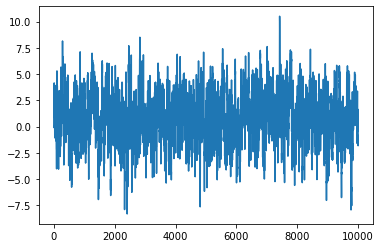

In [14]:
plt.plot(df["Value"])

In [15]:
X = df["Value"].values
result = adfuller(X)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

if result[0] < result[4]["5%"]:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -22.184930
p-value: 0.000000
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567
Reject Ho - Time Series is Stationary


<center><h1>Auto Regressive Model</h1></center>

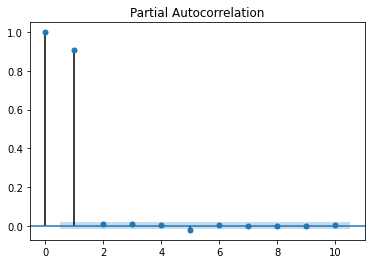

In [16]:
plot_pacf(X, lags=10);

In [17]:
df["Values_shifted"]  = df["Value"].shift()

In [18]:
df.head()

,Time,Value,Values_shifted
0,1,0.000000,NaN
1,2,-0.090263,0.000000
2,3,0.749995,-0.090263
3,4,1.247887,0.749995
4,5,0.131282,1.247887


In [19]:
df.drop('Time', axis = 1, inplace=True)

In [20]:
df.dropna(inplace=True)

In [21]:
df.head()

,Value,Values_shifted
1,-0.090263,0.000000
2,0.749995,-0.090263
3,1.247887,0.749995
4,0.131282,1.247887
5,0.562619,0.131282


In [22]:
y = df.Value.values
X = df.Values_shifted.values

In [23]:
train_size = int(len(X) * 0.80)

In [24]:
X_train, X_test = X[0:train_size], X[train_size:len(X)]
y_train, y_test = y[0:train_size], y[train_size:len(X)]

In [25]:
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [26]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [27]:
lr.coef_

array([0.90550879])

In [28]:
lr.intercept_

0.06868111625452322

In [29]:
y_pred = lr.predict(X_test)

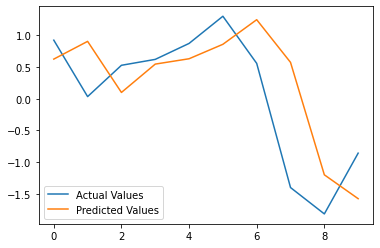

In [30]:
plt.plot(y_test[-10:], label="Actual Values")
plt.plot(y_pred[-10:], label="Predicted Values")
plt.legend()
plt.show()

In [31]:
model = ARIMA(y_train, order=(1,0,0))

In [32]:
model_fit = model.fit()

In [33]:
print(model_fit.summary())

                              ARMA Model Results                              
Dep. Variable:                      y   No. Observations:                 7999
Model:                     ARMA(1, 0)   Log Likelihood              -11364.832
Method:                       css-mle   S.D. of innovations              1.002
Date:                Fri, 03 Jul 2020   AIC                          22735.663
Time:                        06:06:23   BIC                          22756.624
Sample:                             0   HQIC                         22742.838
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7250      0.118      6.130      0.000       0.493       0.957
ar.L1.y        0.9054      0.005    190.940      0.000       0.896       0.915
                                    Roots           